In [209]:
## load modules
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [210]:
## helper functions

# covert feature data: from string to list of values for all observation sets 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)

def aggregate_features(x,col_name):
    x["mean_" + col_name] = x[col_name].apply(np.nanmean)
    x["max_" + col_name] = x[col_name].apply(np.nanmax)
    x["min_" + col_name] = x[col_name].apply(np.nanmin)
    x["std_" + col_name] = x[col_name].apply(np.nanstd)
    x["var_" + col_name] = x[col_name].apply(np.nanvar)
    x["median_" + col_name] = x[col_name].apply(np.nanmedian)
    #x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    return x  

# # remove np.nan values
# def remove_nan_values(x):
#     return [e for e in x if not math.isnan(e)]

def cut_data(x,ind_min,ind_max):
    return x[ind_min:ind_max+1]

def select_day(index_min,index_max):
    if index_max == 23:
        day = '1'
    elif index_min == 24 and index_max == 47:
        day = '2'
    elif index_min == 48 and index_max == 71:
        day = '3' 
    elif index_min == 72 and index_max == 95:
        day = '4'
    elif index_min == 72 and index_max == 121:
        day = '4_5'    
    elif index_min == 48 and index_max == 121:
        day = '3_4_5'    
    else:
        day = '5'  
    return day                        

# only select data of a particular lead-day
def aggregate_features_advanced(x,col_name,index_min,index_max):
    day = str(select_day(index_min,index_max))
    x["mean_" + day + "_" + col_name] = x[col_name].apply(lambda y: cut_data(y,index_min,index_max))
    x["mean_" + day + "_" + col_name] = x["mean_" + day + "_" + col_name].apply(np.nanmean)
    return x    

#def multiply_temp_prec(x):
#    x['precip_temp'] = x[['precip','temp']]



In [211]:
# define features
features = ["temp","precip","rel_humidity","wind_dir","wind_spd"] #,"temp_precip"]

In [212]:
# read meta data
meta_data = pd.read_csv('data/airqo_metadata.csv')
meta_data.rename(columns={'Unnamed: 0':'index'},inplace=True)
meta_data.head()

,index,location,loc_altitude,km2,aspect,dist_motorway,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,0,A,1122.4,1.9,194.0,NaN,NaN,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
1,1,B,1155.4,5.4,219.8,NaN,528.078476,2172.680462,1144.376412,531.103271,65.142004,1.042809,22243,5735,116,1144,239
2,2,C,1178.3,8.5,168.7,NaN,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
3,3,D,980.8,0.8,90.0,NaN,NaN,265.896472,NaN,339.693908,76.024389,11.601442,3596,663,7,651,99
4,4,E,1186.5,1.6,121.0,NaN,850.423131,NaN,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43


In [213]:
# read train data
data = pd.read_csv('data/train.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            15539 non-null  object 
 1   location      15539 non-null  object 
 2   temp          15539 non-null  object 
 3   precip        15539 non-null  object 
 4   rel_humidity  15539 non-null  object 
 5   wind_dir      15539 non-null  object 
 6   wind_spd      15539 non-null  object 
 7   atmos_press   15539 non-null  object 
 8   target        15539 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [214]:
# def multiply_function(x,y):
#     return np.array(x) * np.array(y)
    
# z = data[['precip','temp']]
# z['precip_temp'] = np.ones(len(z)) * np.nan
# #z.apply(multiply_function(z['precip'],z['temp']),axis=0)
# for ind in z.index[:5]:
#     #print(z.loc[z.index[:5],:])
#     #print(np.array(z['precip'].loc[z.index==ind]) * np.array(z['temp'].loc[z.index==ind]))
#     z['precip_temp'].loc[ind] = np.array(z['precip'].loc[ind]) * np.array(z['temp'].loc[ind])
#     print(' ')

In [215]:
# convert big string to a list of floats in every observation set
for feature in features : 
    data[feature] = data[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])    

In [216]:
# calculate mean of features dependent on lead day
for feature in features:
    data = aggregate_features(data,feature)   
    for ind_range in [(0,23),(24,47),(48,71),(72,95),(96,121),(72,121),(48,121)]:
        data = aggregate_features_advanced(data,feature,ind_range[0],ind_range[1]) 
data.head()          

/Users/jeromesauer/neuefische/Project2_AirQuality/.venv/lib/python3.9/site-packages/pandas/core/apply.py:1099: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(


,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,mean_temp,...,std_wind_spd,var_wind_spd,median_wind_spd,mean_1_wind_spd,mean_2_wind_spd,mean_3_wind_spd,mean_4_wind_spd,mean_5_wind_spd,mean_4_5_wind_spd,mean_3_4_5_wind_spd
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304,22.299527,...,0.394041,0.155268,0.666250,NaN,NaN,NaN,NaN,0.677348,0.677348,0.677348
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702,24.679063,...,0.539199,0.290736,0.744167,0.774201,1.013715,0.829271,1.010417,0.869667,0.938605,0.902660
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304,24.112317,...,0.585221,0.342484,0.942500,NaN,1.112917,0.931424,1.144514,1.034033,1.088146,1.036621
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238,20.845273,...,0.580259,0.336701,1.388333,1.465370,1.318438,2.031354,1.911833,1.038472,1.189052,1.371171
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750,21.870732,...,0.426251,0.181690,0.542917,0.772674,0.522292,0.629773,NaN,NaN,NaN,0.629773


In [217]:
# remove rows with NaN values in aggregated data
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14648 entries, 1 to 15538
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14648 non-null  object 
 1   location                 14648 non-null  object 
 2   temp                     14648 non-null  object 
 3   precip                   14648 non-null  object 
 4   rel_humidity             14648 non-null  object 
 5   wind_dir                 14648 non-null  object 
 6   wind_spd                 14648 non-null  object 
 7   atmos_press              14648 non-null  object 
 8   target                   14648 non-null  float64
 9   mean_temp                14648 non-null  float64
 10  max_temp                 14648 non-null  float64
 11  min_temp                 14648 non-null  float64
 12  std_temp                 14648 non-null  float64
 13  var_temp                 14648 non-null  float64
 14  median_temp           

site D: 4976 observations
site A: 4539 observations
site E: 2785 observations
site C: 1694 observations
site B: 654 observations


Text(0.5, 0, 'target [$\\mathregular{µg m^{-3}}$]')

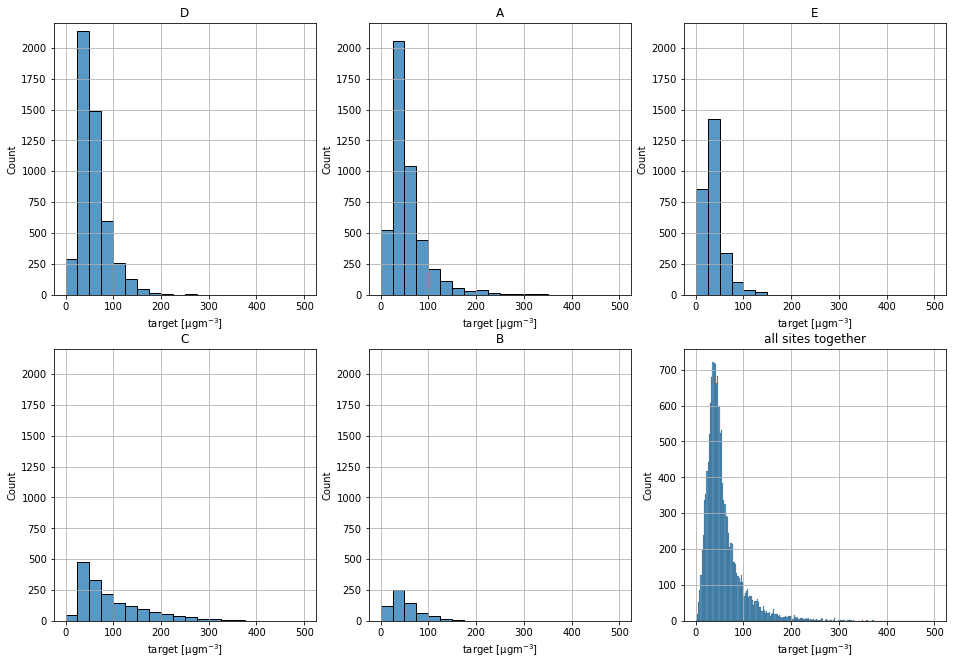

In [218]:
# look at histograms of target variable for the five different stations and aggregated over all five stations
# also print the respective number of observations
fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,11))
ax = np.reshape(ax,6)
bins = np.arange(0,501,25)

for i,site in enumerate(data['location'].unique()):
    print(f"site {site}: {len(data[data['location']==site])} observations")
    sns.histplot(x='target',data=data[data['location']==site],ax=ax[i],bins=bins)
    ax[i].set_title(site)
    ax[i].grid()
    ax[i].set_ylim([0,2200])
    ax[i].set_xlabel('target [$\mathregular{µg m^{-3}}$]')
sns.histplot(x='target',data=data,ax=ax[-1],bins=np.arange(0,501,2.5))    
ax[-1].set_title('all sites together') 
ax[-1].grid() 
ax[-1].set_xlabel('target [$\mathregular{µg m^{-3}}$]') 

Text(0.5, 1.0, 'data of all sites')

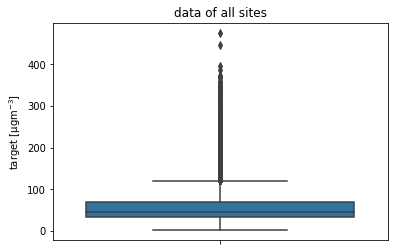

In [219]:
# distribution of aggregated target variable in boxplot
fig,ax = plt.subplots() 
sns.boxplot(y='target',data=data,ax=ax)
ax.set_ylabel('target [$\mathregular{µgm^{-3}}$]')
ax.set_title('data of all sites')

In [220]:
# take mean features for data analysis
features = ["mean_" + feature for feature in features]

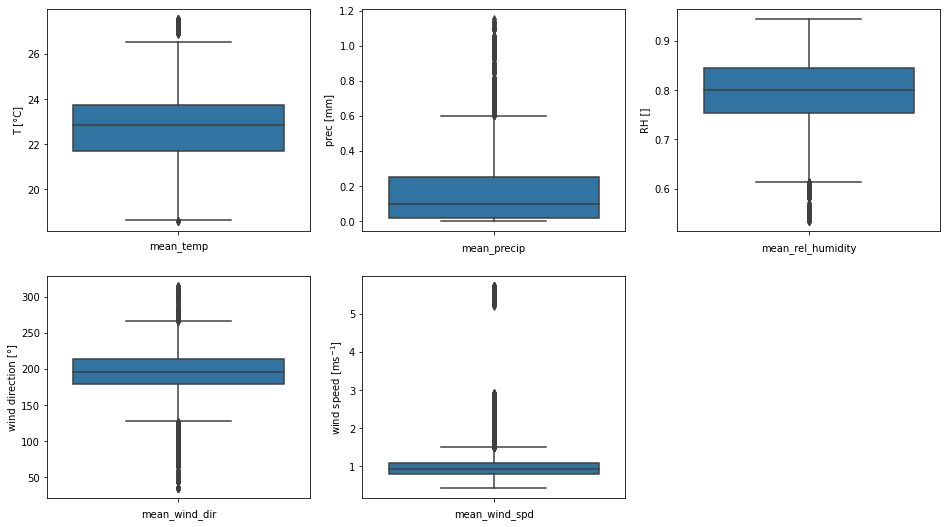

In [221]:
# look at distributions of mean features
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(16,9))
ax = np.reshape(ax,6)
units = ['T [°C]','prec [mm]','RH []','wind direction [°]','wind speed [$\mathregular{ms^{-1}}}$]']

for i,feature in enumerate(['mean_temp','mean_precip','mean_rel_humidity','mean_wind_dir','mean_wind_spd']):
    sns.boxplot(y=data[feature],ax=ax[i]) 
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel(units[i])
ax[-1].remove() 


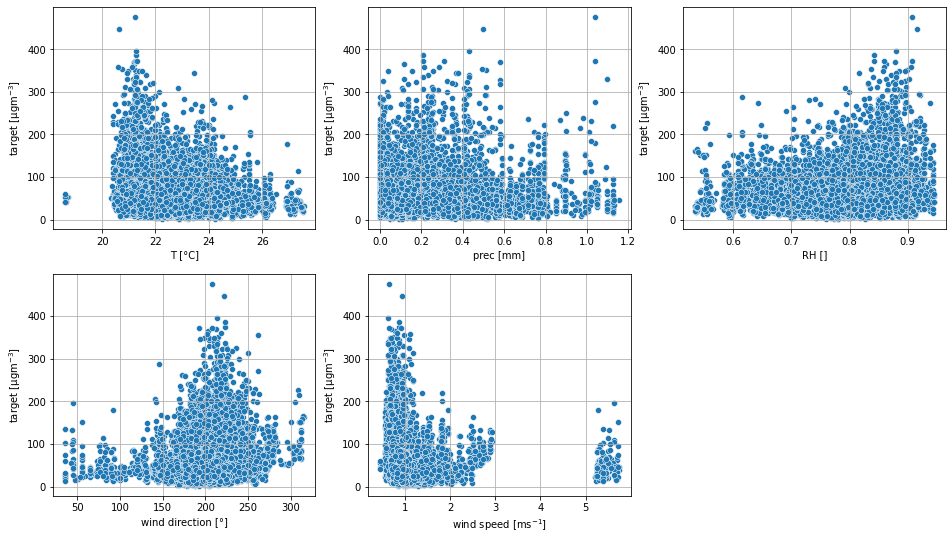

In [222]:
# scatterplots between target and feature variables
fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,9))
ax = np.reshape(ax,6)
units = ['T [°C]','prec [mm]','RH []','wind direction [°]','wind speed [$\mathregular{ms^{-1}}}$]']

for i,feature in enumerate(['mean_temp','mean_precip','mean_rel_humidity','mean_wind_dir','mean_wind_spd']):
    sns.scatterplot(x=data[feature], y=data['target'], ax=ax[i])
    ax[i].grid()
    ax[i].set_ylabel('target [$\mathregular{µgm^{-3}}$]')
    ax[i].set_xlabel(units[i])
ax[-1].remove()    


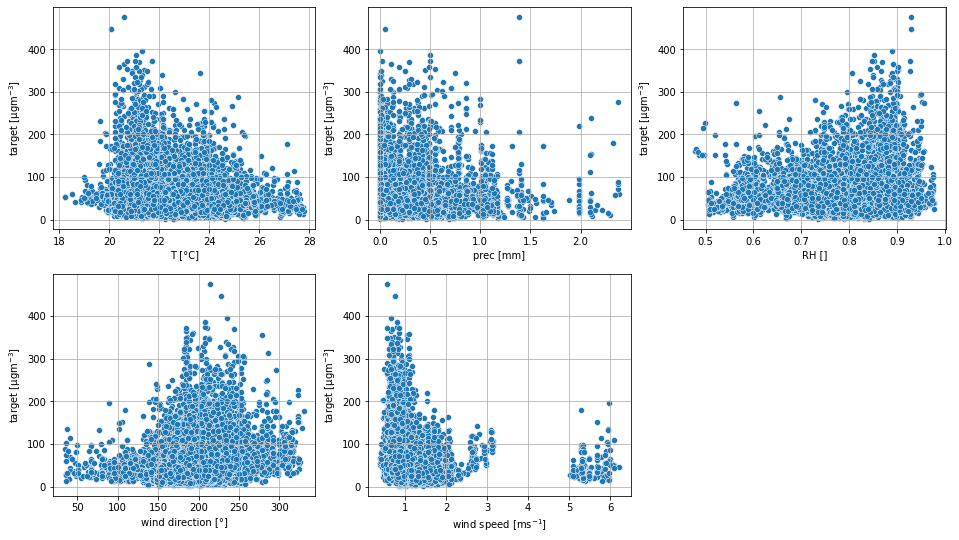

In [223]:
# scatterplots between target and feature variables
fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,9))
ax = np.reshape(ax,6)
units = ['T [°C]','prec [mm]','RH []','wind direction [°]','wind speed [$\mathregular{ms^{-1}}}$]']

for i,feature in enumerate(['mean_4_5_temp','mean_4_5_precip','mean_4_5_rel_humidity','mean_4_5_wind_dir','mean_4_5_wind_spd']):
    sns.scatterplot(x=data[feature], y=data['target'], ax=ax[i])
    ax[i].grid()
    ax[i].set_ylabel('target [$\mathregular{µgm^{-3}}$]')
    ax[i].set_xlabel(units[i])
ax[-1].remove()    


In [224]:
# # scatterplots between target and feature variables
# fig,ax = plt.subplots(nrows=2,ncols=3,squeeze=False,figsize=(16,9))
# ax = np.reshape(ax,6)
# units = ['T [°C]','prec [mm]','RH []','wind direction [°]','wind speed [$\mathregular{ms^{-1}}}$]']

# for i,feature in enumerate(['mean_3_4_5_temp','mean_3_4_5_precip','mean_3_4_5_rel_humidity','mean_3_4_5_wind_dir','mean_3_4_5_wind_spd']):
#     sns.scatterplot(x=data[feature], y=data['target'], ax=ax[i])
#     ax[i].grid()
#     ax[i].set_ylabel('target [$\mathregular{µgm^{-3}}$]')
#     ax[i].set_xlabel(units[i])
# ax[-1].remove()    


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14648 entries, 1 to 15538
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14648 non-null  object 
 1   location                 14648 non-null  object 
 2   temp                     14648 non-null  object 
 3   precip                   14648 non-null  object 
 4   rel_humidity             14648 non-null  object 
 5   wind_dir                 14648 non-null  object 
 6   wind_spd                 14648 non-null  object 
 7   atmos_press              14648 non-null  object 
 8   target                   14648 non-null  float64
 9   mean_temp                14648 non-null  float64
 10  max_temp                 14648 non-null  float64
 11  min_temp                 14648 non-null  float64
 12  std_temp                 14648 non-null  float64
 13  var_temp                 14648 non-null  float64
 14  median_temp           

In [226]:
# redefine features for correlation analysis
features = [prefix + feature[5:] for feature in features for prefix in ['mean_','mean_3_4_5_','mean_4_5_','mean_5_','mean_4_','mean_3_','mean_2_','mean_1_']]

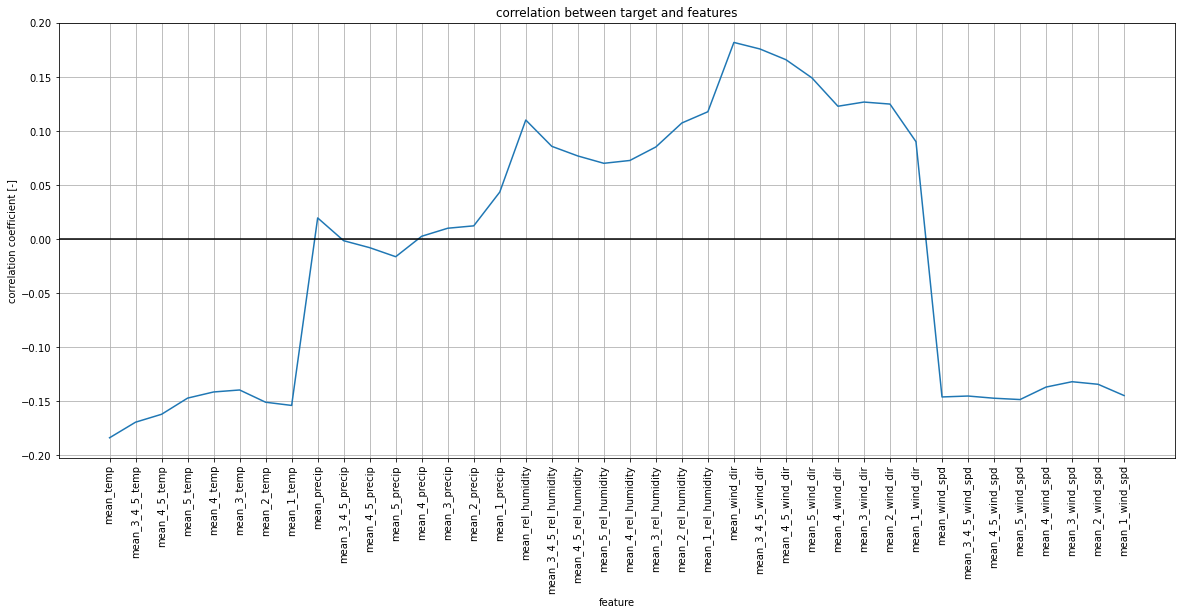

In [227]:
# corelations between features and target variable
corr = data[features + ['target']].corr()
#fig,ax=plt.subplots(figsize=(16,9))
#sns.heatmap(data=corr,ax=ax,cmap='bwr',vmin=-1.,vmax=1.,mask = np.triu(corr))

fig=plt.figure(figsize=(20,8))
plt.plot(corr['target'][:-1])
plt.grid()
plt.xticks(rotation=90);
plt.xlabel('feature')
plt.ylabel('correlation coefficient [-]')
plt.title('correlation between target and features')
plt.axhline(y=0,color='k')


In [228]:
data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,mean_temp,...,std_wind_spd,var_wind_spd,median_wind_spd,mean_1_wind_spd,mean_2_wind_spd,mean_3_wind_spd,mean_4_wind_spd,mean_5_wind_spd,mean_4_5_wind_spd,mean_3_4_5_wind_spd
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702,24.679063,...,0.539199,0.290736,0.744167,0.774201,1.013715,0.829271,1.010417,0.869667,0.938605,0.902660
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238,20.845273,...,0.580259,0.336701,1.388333,1.465370,1.318438,2.031354,1.911833,1.038472,1.189052,1.371171
5,ID_train_10000,E,"[26.225, 26.25, 26.95833333, 27.925, 28.416666...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7566666670000001, 0.7090833329999999, 0.632...","[nan, 104.3737208, 161.28512859999995, 161.322...","[nan, 1.4858333330000002, 1.090833333, 0.94166...","88.56583333,88.55,88.50916667,88.44083333,88.3...",17.005000,22.581950,...,0.531331,0.282313,1.075000,1.236000,1.294298,1.146508,1.129896,0.941167,1.033605,1.067476
6,ID_train_10001,C,"[21.86666667, 21.38333333, 20.75, 20.74166667,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.548333333, 0.571666667, 0.589166667, 0.57, ...","[334.0827161, 332.4037603, 328.58290530000005,...","[1.1525, 1.055, 1.11, 1.385833333, 1.2, 1.2508...","87.73666667,87.74416667,87.7475,87.78,87.84833...",53.100000,23.638430,...,0.445947,0.198869,0.893333,1.184375,0.713194,0.975486,0.922326,0.992967,0.958367,0.963995
7,ID_train_10002,A,"[28.24166667, 27.9, 26.45833333, 24.31666667, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.52725, 0.515833333, 0.585916667, 0.6965, 0....","[328.4616193, 336.5790368000001, 346.5753952, ...","[1.926666667, 1.635, 0.744166667, 0.454166667,...","88.01416667,88.01166667,88.0375,88.13083333,88...",55.051143,22.624518,...,0.475694,0.226285,0.716667,0.838646,0.971632,1.043056,0.904653,0.767262,0.840537,0.910978


In [229]:
features = ["mean_4_5_temp","mean_4_5_precip","mean_4_5_rel_humidity","mean_4_5_wind_dir","mean_4_5_wind_spd"]

In [230]:
# export new data to csv. file
data[features + ['target']].to_csv('data/train_4-5_modelling.csv',index=False)